# Covid-19 data 

## Importing the relevent libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the covid dataset

In [2]:
dataset = pd.read_csv("covid_data.csv")

In [3]:
dataset.head()

,age,Body Temp,Chronic Disease,Blood O2 Level in Percentage,Anti Bodies
0,10,Moderate,0,97,127181
1,80,High,0,92,61004
2,10,Low,0,97,111911
3,81,High,4,75,39010
4,12,Moderate,0,97,110911


In [4]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Importing Scikit Learn Library for categorical data

In [5]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

### Encoding the categorical variables

In [6]:
ct = ColumnTransformer(transformers = [("encoder", OneHotEncoder(), [1])], remainder = "passthrough")
X = np.array(ct.fit_transform(X))

In [7]:
print(X)

[[0.0 0.0 1.0 10 0 97]
 [1.0 0.0 0.0 80 0 92]
 [0.0 1.0 0.0 10 0 97]
 [1.0 0.0 0.0 81 4 75]
 [0.0 0.0 1.0 12 0 97]
 [0.0 1.0 0.0 18 0 66]
 [0.0 0.0 1.0 13 0 93]
 [1.0 0.0 0.0 94 4 64]
 [1.0 0.0 0.0 86 2 76]
 [0.0 0.0 1.0 20 0 92]
 [0.0 0.0 1.0 15 0 94]
 [0.0 0.0 1.0 15 0 92]
 [0.0 1.0 0.0 16 0 92]
 [0.0 0.0 1.0 17 0 93]
 [0.0 0.0 1.0 18 0 93]
 [0.0 0.0 1.0 19 0 92]
 [0.0 0.0 1.0 19 0 89]
 [0.0 0.0 1.0 12 0 97]
 [0.0 0.0 1.0 20 0 93]
 [0.0 0.0 1.0 24 0 92]
 [0.0 0.0 1.0 25 0 93]
 [1.0 0.0 0.0 59 2 68]
 [1.0 0.0 0.0 63 1 66]
 [0.0 0.0 1.0 25 1 62]
 [1.0 0.0 0.0 26 0 94]
 [0.0 1.0 0.0 26 0 97]
 [0.0 0.0 1.0 28 0 99]
 [1.0 0.0 0.0 59 0 69]
 [0.0 0.0 1.0 28 0 89]
 [0.0 0.0 1.0 29 0 93]
 [0.0 0.0 1.0 48 0 93]
 [0.0 0.0 1.0 30 0 62]
 [0.0 0.0 1.0 30 0 86]
 [0.0 0.0 1.0 32 0 84]
 [0.0 0.0 1.0 34 1 90]
 [0.0 0.0 1.0 35 0 89]
 [1.0 0.0 0.0 50 2 77]
 [1.0 0.0 0.0 56 2 76]
 [1.0 0.0 0.0 56 1 77]
 [1.0 0.0 0.0 36 1 90]
 [1.0 0.0 0.0 38 2 75]
 [0.0 0.0 1.0 40 0 90]
 [1.0 0.0 0.0 40 0 92]
 [1.0 0.0 0

## Training and Testing the dataset

### Dividing the data in train and test data

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 0)

## Using Linear Regression

In [9]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

### Reshaping of the data

In [10]:
# predicting the test set results
y_pred = regressor.predict(X_test)
np.set_printoptions(precision = 3)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1))

[[ 98523.191  93010.   ]
 [ 65402.264  66019.   ]
 [ 91633.957  91019.   ]
 [ 59006.199  59994.   ]
 [ 83371.86   83891.   ]
 [ 37389.494  46016.   ]
 [ 30993.428  37914.   ]
 [ 61449.821  62001.   ]
 [ 88243.989  90001.   ]
 [ 44653.711  42099.   ]
 [ 60509.248  61018.   ]
 [ 94138.001  93091.   ]
 [ 81045.966  75012.   ]
 [ 87382.408  88012.   ]
 [ 89441.362  90015.   ]
 [ 73918.161  71191.   ]
 [ 45028.695  42010.   ]
 [ 64830.56   67019.   ]
 [ 62066.945  62019.   ]
 [107662.326 110911.   ]
 [ 49277.928  39010.   ]
 [ 66394.372  61082.   ]
 [110895.003 111911.   ]
 [ 76026.676  78004.   ]
 [103591.699 102019.   ]
 [ 43955.278  39010.   ]
 [ 61761.269  62019.   ]
 [ 83187.824  84008.   ]]


## Plotting the Graph for predicted and test data

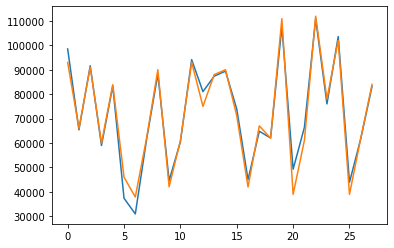

In [11]:
# Visualizing results
plt.plot(y_pred)
plt.plot(y_test)
plt.show()

## Determining difference between Test and Predicted data

In [12]:
# y_pred = regressor.predict(X_test)

print(str(y_test) + " - " + str(y_pred))

[ 93010  66019  91019  59994  83891  46016  37914  62001  90001  42099
  61018  93091  75012  88012  90015  71191  42010  67019  62019 110911
  39010  61082 111911  78004 102019  39010  62019  84008] - [ 98523.191  65402.264  91633.957  59006.199  83371.86   37389.494
  30993.428  61449.821  88243.989  44653.711  60509.248  94138.001
  81045.966  87382.408  89441.362  73918.161  45028.695  64830.56
  62066.945 107662.326  49277.928  66394.372 110895.003  76026.676
 103591.699  43955.278  61761.269  83187.824]


In [13]:
regressor_preds = regressor.predict(X_test)

## Finding accuracy of the trained data using test data

In [14]:
regressor.fit(X_train, y_train)
accuracies = {}
accuracy = regressor.score(X_test, y_test)*100

accuracies["Linear Regression"] = accuracy
print("Test Accuracy {:.2f}%".format(accuracy))

Test Accuracy 96.92%


# We have got a trained ML model with accuracy of 96.92%